# **Jeremmyy**

In [1]:
import scipy.stats
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
from tqdm import tqdm_notebook as pbar
from viz import MOResultsVisualizer
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from neurophox.numpy import *
from neurophox.tensorflow import *

from neurophox.ml import LinearMultiModelRunner

# Comment this out if you do not have latex (or associated requirements) installed
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Charter']})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

import warnings
from collections import namedtuple

warnings.filterwarnings('ignore')

# neurophox imports

# test_mesh = interactive(RMNumpy, units=(1,5))
# test_mesh.plot()


2024-02-04 16:01:42.692712: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-04 16:01:42.710759: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 16:01:42.710774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 16:01:42.711371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 16:01:42.714691: I tensorflow/core/platform/cpu_feature_guar

'random_theta'

Text(0.5, 1.0, 'Propagation for 64x64 random_theta')

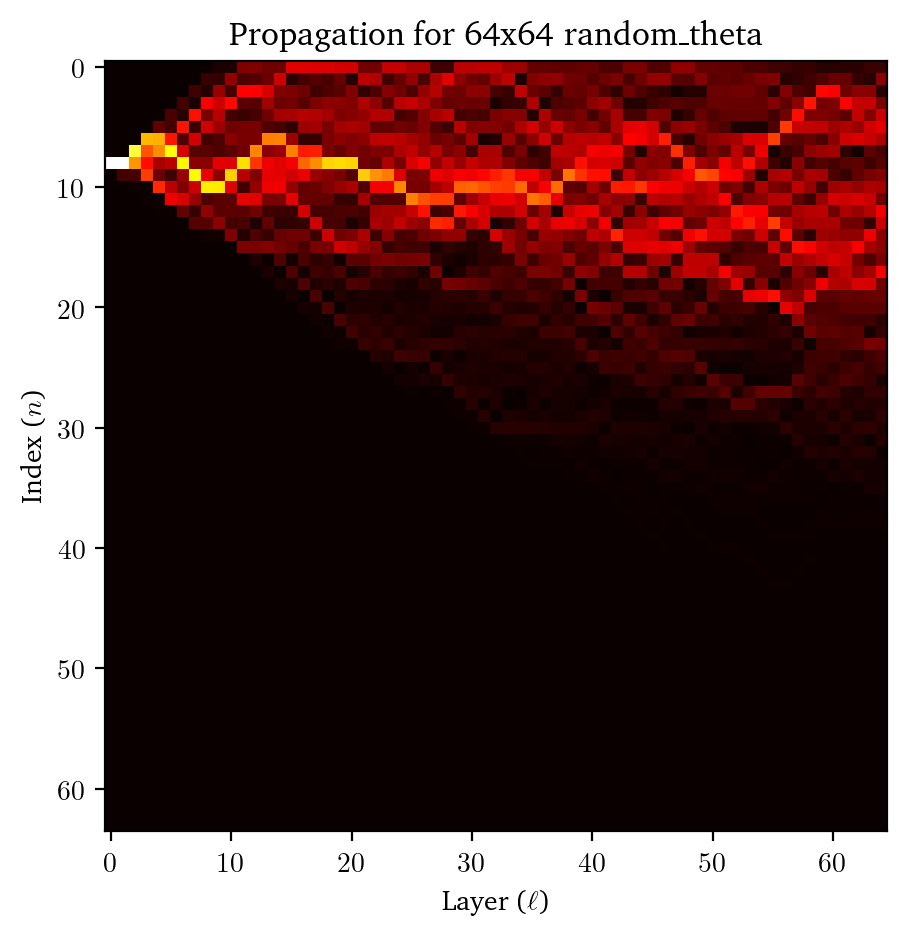

In [2]:
#single mvm test
max = 128
min = 3
test_mesh = 0
units = max // 2
num_layers = units
rng = np.random.default_rng(0xdeadbeef)
test_val = rng.integers(0, units)
# init_method = widgets.Dropdown(options=['haar_rect', 'random_theta']).value
init_method = 'random_theta'
display(init_method)
# @interact(units=(3,128), num_layers=(3,128), test_val=(0,max))

# def gen_test_mesh(units,num_layers,test_val):
test_mesh = RMNumpy(units, num_layers=num_layers, theta_init_name=init_method, phi_init_name=init_method)
# test_mesh.plot(plt)

plt.figure(dpi=200, figsize=(10, 5))
plt.imshow(np.abs(test_mesh.propagate(np.eye(units)[test_val]).squeeze()).T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title(f'Propagation for {units}x{num_layers} {init_method}')

# gammavals = np.array(  [[4.73716227, 2.17789493, 6.00926144]] )
# thetavals = np.array(  [[4.73716227, 2.17789493, 6.00926144, 1,1]] )
# phivals = np.array(  [[4.73716227, 2.17789493, 6.00926144,1,1]] )

In [3]:
arbitrary_multiply_matrix = np.zeros(shape=(units, units))
arbitrary_multiply_matrix = unitary_group.rvs(units,random_state=rng)
Dataset = namedtuple('Dataset', ['X', 'y'])
for i in range(arbitrary_multiply_matrix.shape[0]):
    num = rng.random(1, np.floating)
    arbitrary_multiply_matrix[i][i] = num
X = []
Y = []
for i in range(20):
    x = rng.random((units,units), dtype=np.floating)
    y = x * arbitrary_multiply_matrix
    X.append(x)
    Y.append(y)




In [4]:
# model_runner    =   LinearMultiModelRunner()
HIGH_RATE = 0.01
LOW_RATE = 0.002
mr = LinearMultiModelRunner(experiment_name=f"rm-prm-",
                            layer_names=["layer0"],
                            layers= [RM(units, num_layers=num_layers, theta_init_name=init_method, phi_init_name=init_method)]
,
                            batch_size = 20,
                            optimizer=tf.keras.optimizers.Adam(learning_rate=HIGH_RATE),
                            logdir="/tmp/tensorboard/neurophox/")
%load_ext tensorboard
%tensorboard --logdir /tmp/tensorboard/neurophox  --host 0.0.0.0 --reload_interval 2
mr.run(50, arbitrary_multiply_matrix, pbar)



2024-02-04 16:01:44.371199: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-04 16:01:44.371735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-04 16:01:44.371826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

  0%|          | 0/2500 [00:00<?, ?it/s]

2024-02-04 16:01:48.172111: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-04 16:01:49.406127: I external/local_xla/xla/service/service.cc:168] XLA service 0x60e8c8ffd7d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-04 16:01:49.406141: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-02-04 16:01:49.408899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-04 16:01:49.422810: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1707080509.456348   18357 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'batch_size', 'experiment_name', 'iterate', 'iterations_per_epoch', 'iterations_per_tb_update', 'iters', 'layer_names', 'layers', 'logdir', 'losses', 'optimizers', 'results', 'run', 'save', 'store_params', 'summary_writers', 'train_on_test', 'update_tensorboard']
loss : 0.34796350345355187


<Figure size 640x480 with 0 Axes>

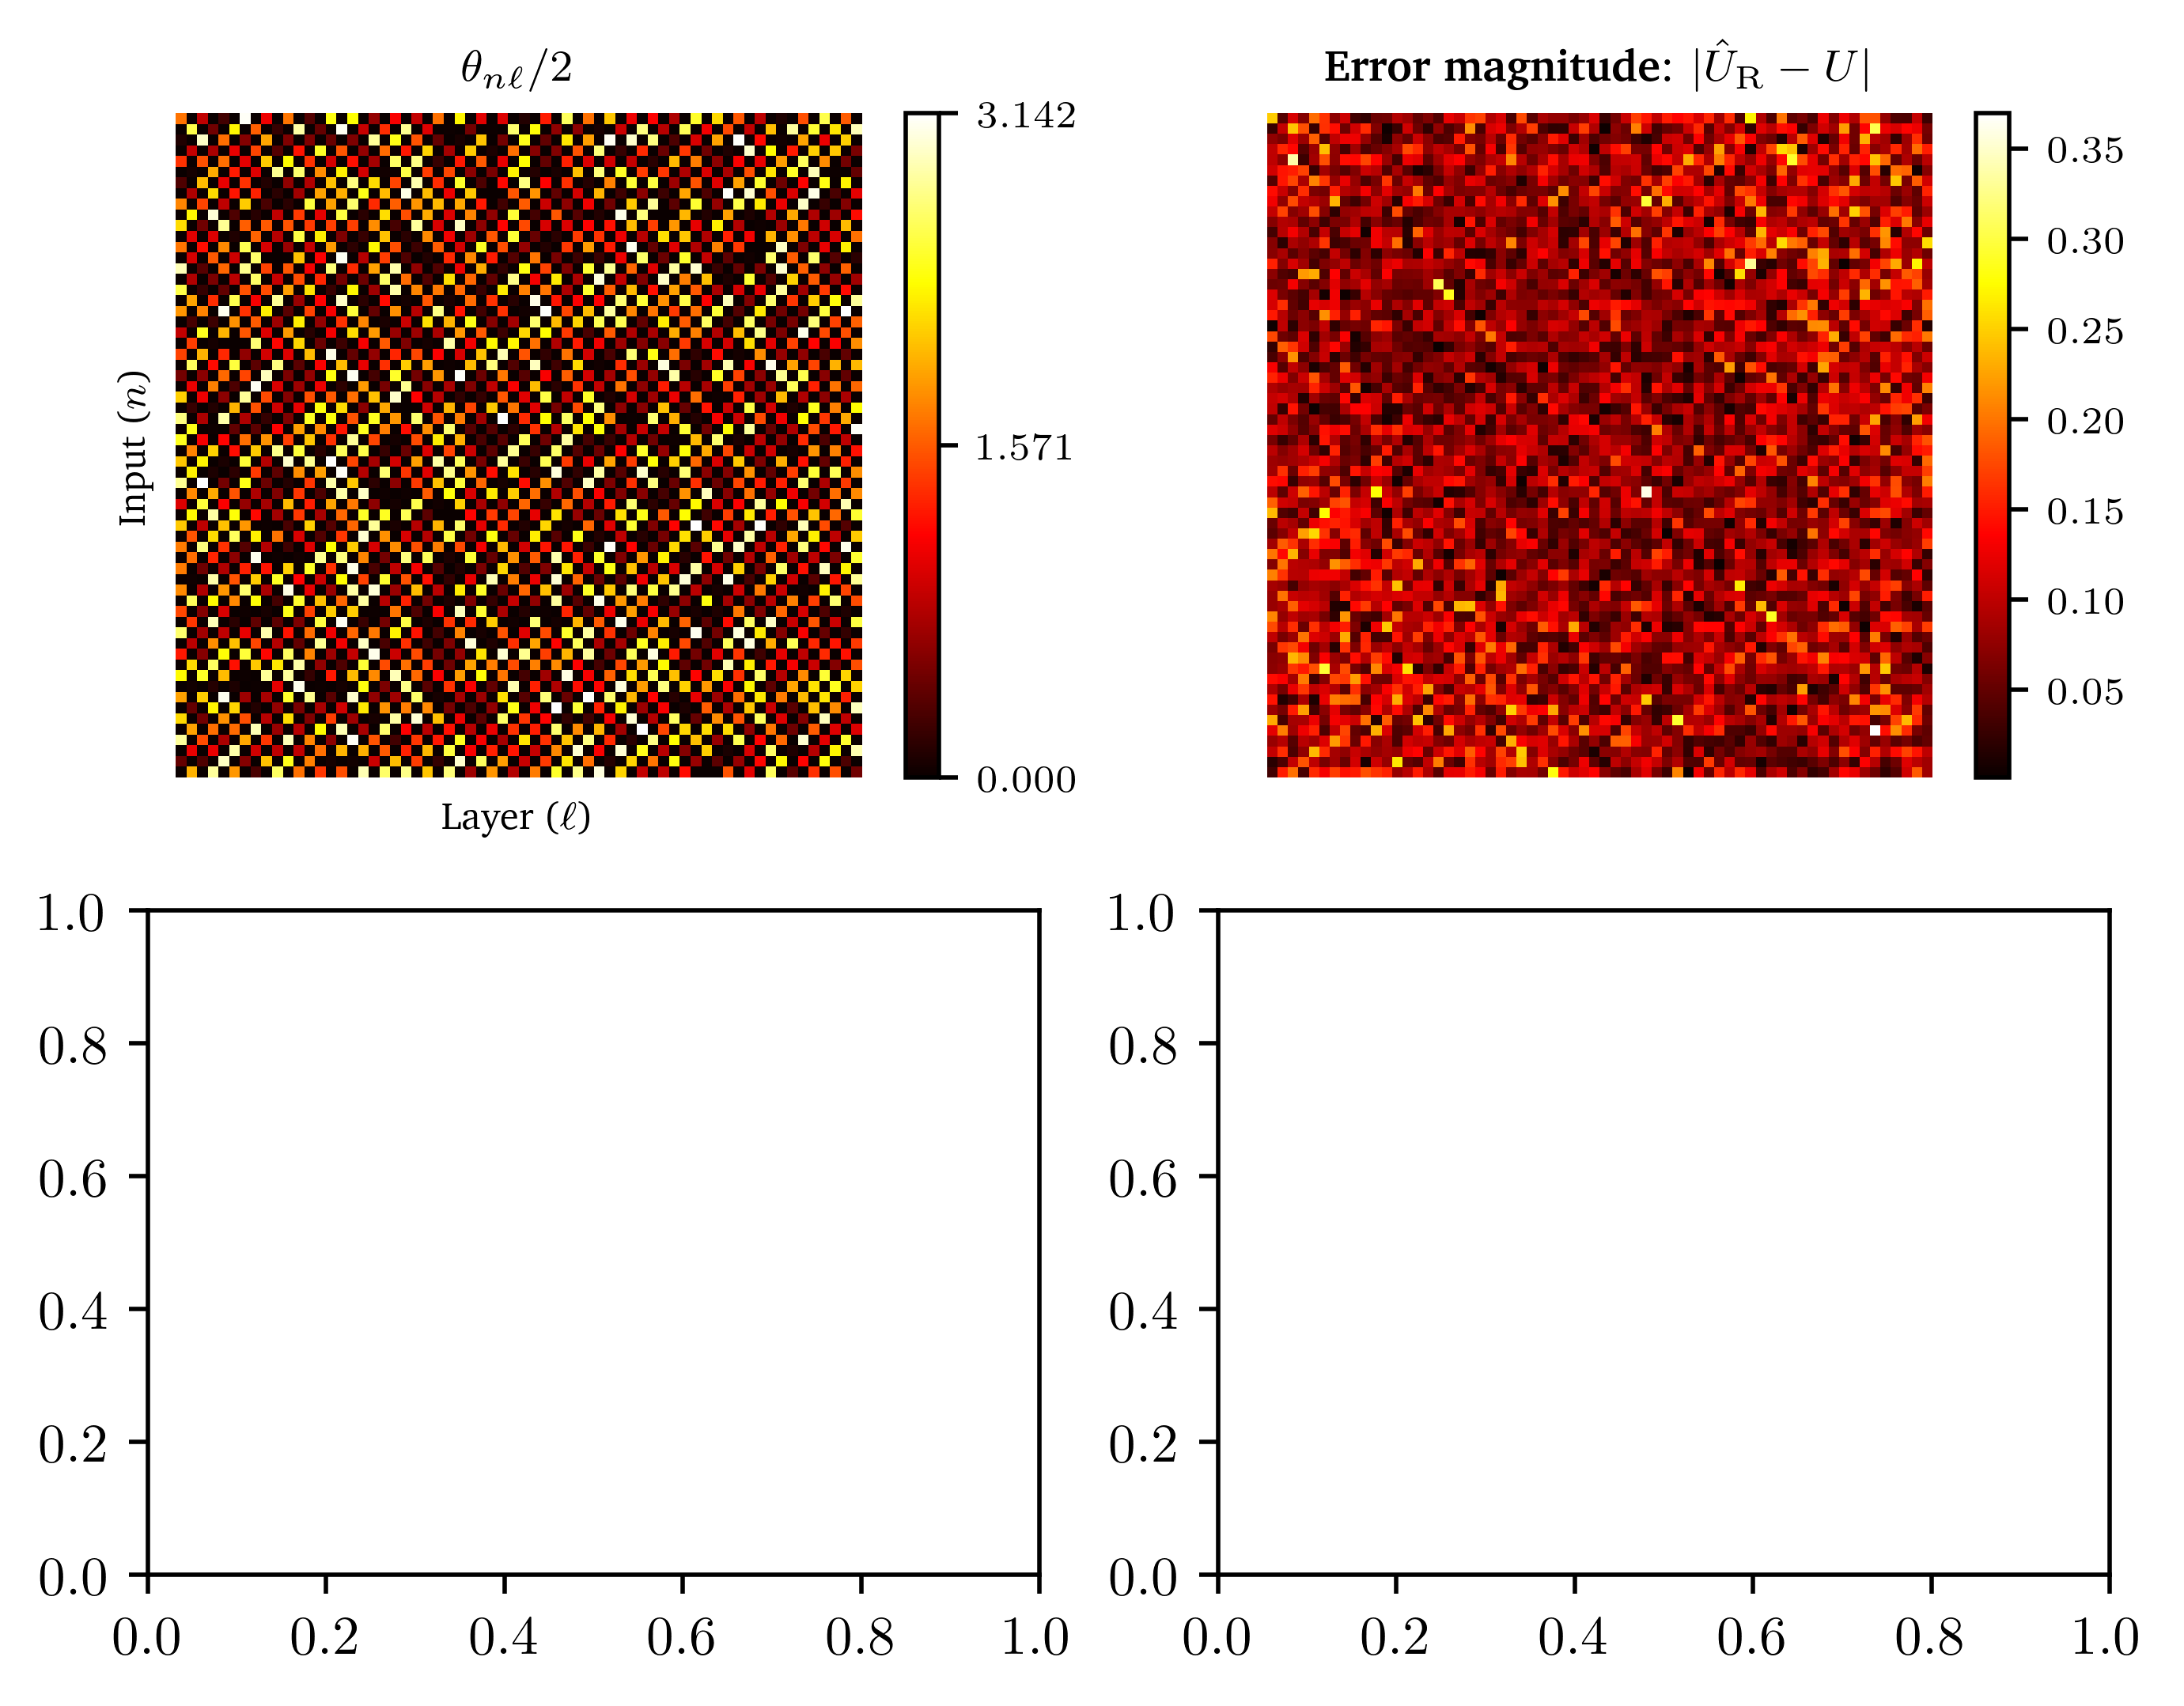

In [5]:
print(dir(mr))
print(f'loss : {mr.losses["layer0"][len(mr.losses["layer0"])-1]}')
plt.figure()
fig, axes = plt.subplots(2, 2, dpi=500)

viz = MOResultsVisualizer('rm', mr.results["layer0"])
viz.plot_theta_checkerboard(axes[0, 0], plt, -1)
viz.plot_error(axes[0, 1], plt, -1)

#axes[1, 0].text(-0.2, 1.1, r'(\textbf{d})', transform=axes[0, 0].transAxes, size=10)